In [19]:
# RECEITA DE TREINAMENTO
# 1 - DESIGN DO MODELO (INPUT, OUTPUT, FORWARD PASS)
# 2 - DEFINIÇAO DA FUNÇÃO DE CUSTO E OTIMIZADOR
# 3 - LOOP DE TREINAMENTO:
#     - FORWARD PASS: CALCULAR A PREDIÇÃO E O CUSTO
#     - BACKWARPASS: CALCULAR OS GRADIENTES
#     - ATUALIZAR OS PESOS

In [20]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# PREPARAÇÃO DA DATA
x_numpy = np.array([5,7,2,9,4,10,9,4,6,1])
y_numpy = np.array([1,1,0,1,0,1,1,0,1,0])


x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)
x = x.view(x.shape[0], 1)

print(x.shape)
print(y.shape)

torch.Size([10, 1])
torch.Size([10, 1])


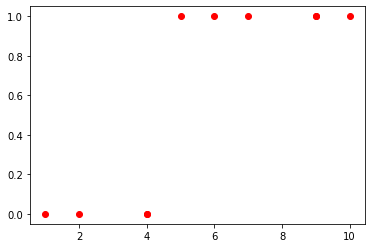

In [22]:
plt.plot(x_numpy, y_numpy, 'ro')


In [23]:
# CLASS DE REGRESSÃO LOGÍSTICA

class RegressaoLogistica(nn.Module):
  def __init__(self, n_input, n_output):
    super(RegressaoLogistica, self).__init__()
    self.Linear = nn.Linear(n_input, 1)

  def forward(self, x):
    y_hat = torch.sigmoid(self.Linear(x))
    return y_hat

In [24]:
# DEFINICIÇÃO DE MODELO
input_size = 1
output_size = 1
model = RegressaoLogistica(1,1)

In [25]:
# DEFINIÇÃO DA FUNÇAO DE CUSTO E OTIMIZADOR
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
print(model.parameters())

<generator object Module.parameters at 0x7fbdf7cf4d58>


In [26]:
# LOOP DE TREINAMENTO
num_epochs = 2000
contador_custo = []
for epoch in range(num_epochs):
  #forward pass and loos
  y_hat = model(x)
  loss = criterion(y_hat, y)
  contador_custo.append(loss)
  # print(y_hat)
  #backward pass (calcular gradientes)
  loss.backward()
  #update (atualizar os pesos)
  optimizer.step()

  if (epoch+1)%10 == 0:
      print("===============================")
      print('Epoch: ', epoch)
      print('Custo: {:.20f}'.format(loss.item())) 
      print('m: {:.5f}'.format(model.Linear.weight.data.detach().item()))
      print('m (gradiente): {:.5f}'.format(model.Linear.weight.grad.detach().item()))
      print('b: {:.5f}'.format(model.Linear.bias.data.detach().item()))
      print('b (gradiente): {:.5f}'.format(model.Linear.bias.grad.detach().item()))

  #limpar o otimizador
  optimizer.zero_grad()

Epoch:  9
Custo: 1.71316945552825927734
m: -0.24093
m (gradiente): -4.05835
b: -0.42925
b (gradiente): -0.45929
Epoch:  19
Custo: 0.67197042703628540039
m: 0.05757
m (gradiente): -1.92945
b: -0.39962
b (gradiente): -0.14546
Epoch:  29
Custo: 0.50723999738693237305
m: 0.17172
m (gradiente): -0.71939
b: -0.39616
b (gradiente): 0.02572
Epoch:  39
Custo: 0.47983694076538085938
m: 0.21972
m (gradiente): -0.33997
b: -0.40226
b (gradiente): 0.08181
Epoch:  49
Custo: 0.47217875719070434570
m: 0.24416
m (gradiente): -0.18443
b: -0.41188
b (gradiente): 0.10526
Epoch:  59
Custo: 0.46879976987838745117
m: 0.25807
m (gradiente): -0.10953
b: -0.42309
b (gradiente): 0.11648
Epoch:  69
Custo: 0.46656799316406250000
m: 0.26667
m (gradiente): -0.07035
b: -0.43508
b (gradiente): 0.12216
Epoch:  79
Custo: 0.46468454599380493164
m: 0.27242
m (gradiente): -0.04892
b: -0.44747
b (gradiente): 0.12503
Epoch:  89
Custo: 0.46291938424110412598
m: 0.27660
m (gradiente): -0.03689
b: -0.46006
b (gradiente): 0.12642

GRÁFICO DA FUNÇÃO DE CUSTO


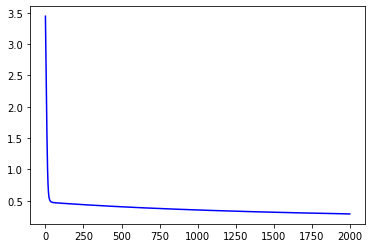

In [27]:
# PLOTANDO O GRÁFICO DA FUNÇÃO DE CUSTO
print("GRÁFICO DA FUNÇÃO DE CUSTO")
plt.plot(contador_custo, 'b')
plt.show()

In [29]:
"""#Fazer a predição"""

# fazer predição de teste
teste = np.array([2, 3, 6, 7, 8])
t_teste = torch.from_numpy(teste.astype(np.float32))
t_teste = t_teste.view(t_teste.shape[0], 1)

In [30]:
with torch.no_grad():
  predicoes = model(t_teste)
  for x, y in zip(t_teste, predicoes):
    #definindo o cutoff / threshold
    status = ""
    if (y >= 0.7):
      status = "aprovado"
    else:
      status = "reprovado"
    print ('x: {:.2f} | ŷ: {:.2f} | '.format(x.detach().item(),y.detach().item()), status)

x: 2.00 | ŷ: 0.26 |  reprovado
x: 3.00 | ŷ: 0.38 |  reprovado
x: 6.00 | ŷ: 0.78 |  aprovado
x: 7.00 | ŷ: 0.87 |  aprovado
x: 8.00 | ŷ: 0.92 |  aprovado
